In [1]:
import zxpartitioner as zxp
import pyzx as zx # NOTE: THIS CURRENTLY ONLY WORKS WITH MY VERSION OF PYZX (I.E. PARAM-ZX)

/home/mjs99/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
ab = zxp.HEdge(['A','B'],1)
abc = zxp.HEdge(['A','B','C'],1)
ac = zxp.HEdge(['A','C'],7)
acd = zxp.HEdge(['A','C','D'],3)
cd = zxp.HEdge(['C','D'],4)

hEdges = [ab,abc,ac,acd,cd]

hNet = zxp.HNet()
hNet.hEdges = hEdges
hNet.hVerts = [zxp.HVert('A'),zxp.HVert('B'),zxp.HVert('C'),zxp.HVert('D')]

In [3]:
hNet.fullReduce(True,False)

Fuse A and B 	=> cost: 12
Fuse AB and C 	=> cost: 15
Fuse ABC and D 	=> cost: 7


15

In [4]:
#TEMP...

NQ = 30 #40 #180 #120 #90 #30
depth = 270 #350 #1200 #1200 #1000 #600 #450 #300

g = zx.generate.cliffordT(NQ,depth)
g.apply_state("+"*NQ)
g.apply_effect("+"*NQ)
zx.draw(g,scale=20,labels=True)
gBackup = g.copy()
zx.simplify.full_reduce(g)
g.normalize()
g = g.copy()
zx.draw(g,scale=20,labels=True)
initT = zx.tcount(g) #TEMP
zx.tcount(g)

25

In [5]:
print(g.scalar.is_zero)
if g.scalar.is_zero: g.scalar = zx.Graph().scalar #TEMP

True


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+                    _  __     _   _       ____                               + 
+                   | |/ /__ _| | | |_   _|  _ \ __ _ _ __                    + 
+                   | ' // _` | |_| | | | | |_) / _` | '__|                   + 
+                   | . \ (_| |  _  | |_| |  __/ (_| | |                      + 
+                   |_|\_\__,_|_| |_|\__, |_|   \__,_|_|                      + 
+                                    |___/                                    + 
+                 Karlsruhe Hypergraph Partitioning Framework                 + 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
*******************************************************************************
*                            Partitioning Context                             *
*******************************************************************************
Partitioning Parameters:
  Hype

T-count: 2


T-count: 0


T-count: 3


T-count: 3


T-count: 1


T-count: 1
PARTITIONED GRAPHS...


T-count: 2


T-count: 0


T-count: 3


T-count: 3


T-count: 1


T-count: 1
CONNECTIVITY (HYPER)GRAPH...


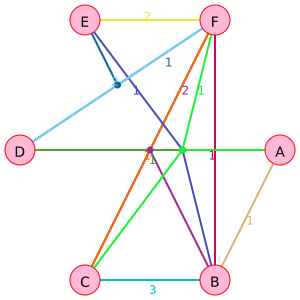

In [6]:
hNet,gs = zxp.partition(g)

# Display partitioned graphs...
print("PARTITIONED GRAPHS...")
for i in range(len(gs)):
    zx.draw(gs[i],scale=20,labels=True)
    print("T-count:",zx.tcount(gs[i]))

print("CONNECTIVITY (HYPER)GRAPH...")
hNet.draw()
hNet0 = hNet.copy()

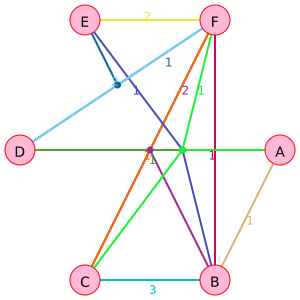

T-counts...
2
0
3
3
1
1


In [7]:
#TEMP
hNet.draw()
print("T-counts...")
for i in gs: print(zx.tcount(i))

In [8]:
from IPython.display import display, Latex

In [9]:
def getGraphParams(g):
    params = set()
    for v in g.vertices(): params = params.union(g.get_params(v))
    return params

def getApproxCrossrefCostPower(hNet): return hNet.fullReduce(False) #TEMP

def getApproxCrossrefCostLatex(hNet): return '$2^{{w}}$'.replace('w',str(getApproxCrossrefCostPower(hNet)))

def getApproxPrecompCostPower(gs,alpha=0.47): # 2^{αt+c} = 2^{cost}
    maxCostPow = 0
    for g in gs:
        t = zx.tcount(g)
        lc = len(getGraphParams(g)) # local cuts
        costPow = alpha*t + lc
        if costPow > maxCostPow: maxCostPow = costPow
    return maxCostPow

def getApproxPrecompCostLatex(gs,alpha=0.47): return '$2^{{w}}$'.replace('w',str(getApproxPrecompCostPower(gs,alpha)))

def getTotalCostLatex(g,hNet,alpha=0.47): return getApproxPrecompCostLatex(gs,alpha) + '+' + getApproxCrossrefCostLatex(hNet)

# TODO - Implement more accurate versions of these functions (that don't just take the largest terms in each case)

In [10]:
alph = 0.5 #0.47 # -1
display(Latex('$2^{{p}}$'.replace('p',str(alph*initT))))
print("Naive result (no partitioning)")

<IPython.core.display.Latex object>

Naive result (no partitioning)


In [11]:
display(Latex(getTotalCostLatex(gs,hNet0.copy(),alph)))
print("The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)")

<IPython.core.display.Latex object>

The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)


Saved to: /home/mjs99/netLatest.txt


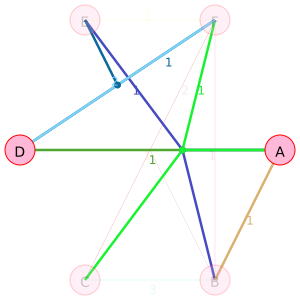

Fuse A and D 	=> cost: 7


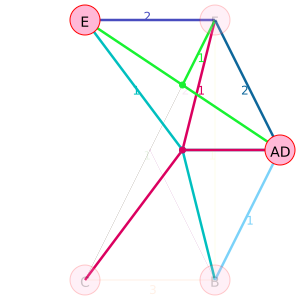

Fuse AD and E 	=> cost: 8


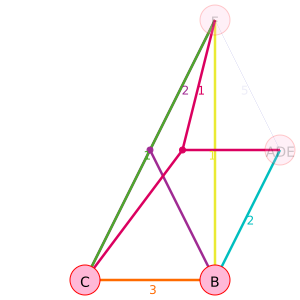

Fuse B and C 	=> cost: 10


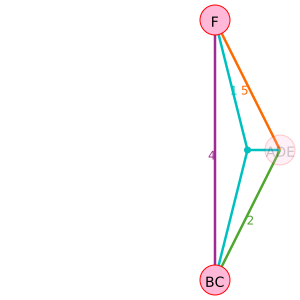

Fuse BC and F 	=> cost: 12


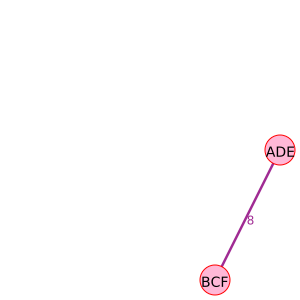

Fuse ADE and BCF 	=> cost: 8


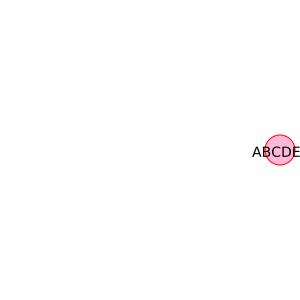

12

In [12]:
hNet0 = hNet.copy()
hNet.save("netLatest")
hNet.fullReduce(True,True)

In [13]:
#-----

In [14]:
k = zxp.getK()
hNet = hNet0.copy()

In [15]:
zxp.estimateCostPrecomp(gs,k)
print("\n--\n")
zxp.estimateCostCrossref(hNet)

1456

--

Fuse A and D 	=> cost: 7
Fuse AD and E 	=> cost: 8
Fuse B and C 	=> cost: 10
Fuse BC and F 	=> cost: 12
Fuse ADE and BCF 	=> cost: 8

 5760
  ~ 4096


5760

In [16]:
%%time
segs = zxp.precompSegments(gs,k)

CPU times: user 892 ms, sys: 550 µs, total: 893 ms
Wall time: 892 ms


In [17]:
#TEMP...
segsBackup = segs.copy()

In [18]:
#TEMP...
segs = segsBackup.copy()

In [19]:
%%time
result = zxp.crossrefSegments(segs,hNet)
result

CPU times: user 24.1 ms, sys: 5.61 ms, total: 29.7 ms
Wall time: 28.6 ms


(-7.62690444323101e-10+6.956833982249125e-11j)

In [20]:
#TEMP...
segs = segsBackup.copy()

In [21]:
%%time
## (GPU VERSION)...
result = zxp.crossrefSegments(segs,hNet,True)
result

CPU times: user 216 ms, sys: 388 ms, total: 604 ms
Wall time: 674 ms


(-7.626907438940123e-10+6.956840659100294e-11j)

In [110]:
# VERIFY THE ANSWER GENERATED HERE IS CORRECT (AS COMPARED TO JUST RUNNING DECOMP TO THE ORIGINAL UNPARTED GRAPH)...

In [111]:
%%time
g = gBackup.copy()
zx.simplify.full_reduce(g)
g.normalize()
if g.scalar.is_zero: g.scalar = zx.Graph().scalar #TEMP
g = g.copy()
zx.draw(g,scale=20,labels=True)
trueRes = zxp.decomp(g)
trueRes

CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 130 ms


(0.00010831318698631057-0.0020961392669987594j)

In [112]:
#TEMP...
result/trueRes

(0.9999998236762411+2.6235510734944343e-08j)

In [1]:
# TODO - POLISH AND PACKAGE THIS PROJECT
# REMAINING: k should be determined automatically, via recursive partitioning until it no longer provides any benefit
# ALSO: MODIFY AS APPROPRIATE SO THAT IT WORKS WITH THE BASE VERSION OF PYZX
# ALSO: if a graph has a free node of e.g. a+b then we know a=b (and likewise a free node of a means a=0, etc.)
# IN THE WRITEUP, don't forget to justify our doing 'if (...): g.scalar = zx.Graph().scalar' - this is because graphs that have many qubits but are
#                 shallow seem to have a high propensity/likelihood of being 0 (immediately - right after the initial Clifford simp), and so these
#                 become negligible (as we need't compute it if its initial scalar is 0) - so by adding the above line, we're effectively just ignoring
#                 these negligible cases
# Maybe also mention somewhere (on the github readme probably) that this is only tested for linux (specifically, WSL), since the kahypar package on
# which we rely doesn't appear to be supported on Windows
# TODO: Currrently crashes if it requires too many params (easily fixed!)
# TODO: CUDA parallelism
# TODO: Do not use my own personal file directory in this notebook when installing quizx
# TOOD: include requirements.txt (see https://stackoverflow.com/questions/31684375/automatically-create-file-requirements-txt)
# Note: Probably won't have time to get around to, but if running on GPU then we needn't pass the scalars back to the CPU between paramZX for computing
#       scalars and the cuda code for regrouping

In [26]:
#--




#TEMP...




#--

In [1]:
import sys
sys.path.insert(0, '..')
#sys.path.insert(0, '../../quizx/pybindings')
sys.path.insert(0,'/home/mjs99/quizx/pybindings') #TEMP <--- THIS SHOULD NOT BE HARD-CODED LIKE THIS!!!
import quizx as qzx
#from fractions import Fraction
import time
import math

/home/mjs99/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [28]:
qzx

<module 'quizx' from '/home/mjs99/quizx/pybindings/quizx/__init__.py'>

In [22]:
def pyzxToQuizx(p_g):
    r_g = zx.Graph(backend='quizx-vec')
    for v in p_g.vertices(): r_g.add_vertex(ty=p_g.type(v), qubit=p_g.qubit(v), row=p_g.row(v), phase=p_g.phase(v))
    for e in p_g.edges(): r_g.add_edge(e,p_g.edge_type(e))
    return r_g

def alpha(nterms,tcount):
    return math.log2(nterms)/tcount

In [23]:
r_g = pyzxToQuizx(gBackup.copy())
#qzx.simplify.clifford_simp(r_g)
qzx.simplify.full_simp(r_g)
r_g.normalize()
#zx.draw(r_g,scale=20)
zx.tcount(r_g)
if g.scalar.is_zero: g.scalar = zx.Graph().scalar #TEMP

In [24]:
%%time
d = qzx.decompose.Decomposer(r_g)

#print(d.max_terms(),"\n")
d.apply_optimizations(True)
d.decomp_all()

CPU times: user 34.1 s, sys: 73.2 ms, total: 34.2 s
Wall time: 34 s


In [25]:
print("BSS...")
print("terms:",d.get_nterms())
print("effective alpha:",alpha(d.get_nterms(),zx.tcount(r_g)))

BSS...
terms: 91307
effective alpha: 0.44536318506502365


In [26]:
%%time
d = qzx.decompose.Decomposer(r_g)
d.use_cats(True)

#print(d.max_terms(),"\n")
d.apply_optimizations(True)
d.decomp_all()

CPU times: user 2.05 s, sys: 7 µs, total: 2.05 s
Wall time: 2.05 s


In [27]:
print("CATS...")
print("terms:",d.get_nterms())
print("effective alpha:",alpha(d.get_nterms(),zx.tcount(r_g)))

CATS...
terms: 3892
effective alpha: 0.3223323241832733


In [46]:
#--




#TEMP...




#--

In [30]:
print(segs[1].localParams) #B
print(segs[2].localParams) #C

segs[2].scalars

zxp.regroupPair(segs,1,2)

['a', 'b', 'c', 'e', 'f', 'g']
['b', 'c', 'e']


TypeError: regroupPair() missing 1 required positional argument: 'B'

In [14]:
#--




#TEMP...




#--

In [55]:
import kahypar

In [72]:
#TEMP...

NQ = 10 #180 #120 #90 #30
depth = 100 #1200 #1200 #1000 #600 #450 #300

g = zx.generate.cliffordT(NQ,depth)
g.apply_state("+"*NQ)
g.apply_effect("+"*NQ)
zx.draw(g,scale=20,labels=True)
gBackup = g.copy()
zx.simplify.full_reduce(g)
g.normalize()
g = g.copy()
zx.draw(g,scale=20,labels=True)
initT = zx.tcount(g) #TEMP
zx.tcount(g)

11

In [109]:
def kahyparPartition(g):
    num_nodes,num_nets,eptr,eind,e_weights,v_weights = zxp.getHyperData(g)
    
    k = 2
    epsilon = 0.5 #0.5 # 0.25 # 0.8 #0.03
    
    hypergraph = kahypar.Hypergraph(num_nodes, num_nets, eptr, eind, k, e_weights, v_weights)
    
    context = kahypar.Context()
    context.loadINIconfiguration("/home/mjs99/kahypar/config/km1_kKaHyPar_sea20.ini")
    
    context.setK(k)
    context.setEpsilon(epsilon)
    
    context.setPartitionFileName("PARTITION_OUTPUT.txt")
    context.writePartitionFile(True)
    
    kahypar.partition(hypergraph, context)
    return k

def bipartition(g):
    k = kahyparPartition(g)
    mem = zxp.readPartitionData()
    gs,vmems = zxp.memToConnectivityGraphs(g,mem)
    for i in range(1,len(gs)): gs[i].scalar = zx.Graph().scalar # ensure the parent scalar is only counted once
    cuts = zxp.getCutsFromVmems(vmems,k)
    hNet = zxp.genHNet(cuts,k)
    gs = zxp.cutAndClean(g,gs,cuts,vmems)
    zxp.accountParamScalars(gs)
    return hNet,gs

In [98]:
hNet,gs = bipartition(g)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+                    _  __     _   _       ____                               + 
+                   | |/ /__ _| | | |_   _|  _ \ __ _ _ __                    + 
+                   | ' // _` | |_| | | | | |_) / _` | '__|                   + 
+                   | . \ (_| |  _  | |_| |  __/ (_| | |                      + 
+                   |_|\_\__,_|_| |_|\__, |_|   \__,_|_|                      + 
+                                    |___/                                    + 
+                 Karlsruhe Hypergraph Partitioning Framework                 + 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
*******************************************************************************
*                            Partitioning Context                             *
*******************************************************************************
Partitioning Parameters:
  Hype

T-count: 2


T-count: 6


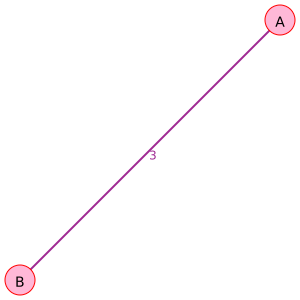

In [99]:
hNet.draw()

In [100]:
alph = 0.5 #0.47 # -1
display(Latex('$2^{{p}}$'.replace('p',str(alph*initT))))
print("Naive result (no partitioning)")

<IPython.core.display.Latex object>

Naive result (no partitioning)


In [101]:
display(Latex(getTotalCostLatex(gs,hNet.copy(),alph)))
print("The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)")

<IPython.core.display.Latex object>

The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)


In [107]:
zx.draw(gs[1],scale=20,labels=True)

cutVerts = []
for v in gs[1].vertices():
    if gs[1].type(v) == 2: cutVerts.append(v)
for v in cutVerts:gs[1].remove_vertex(v)

zx.draw(gs[1],scale=20,labels=True)

In [108]:
hNet,gs = bipartition(gs[1])

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+                    _  __     _   _       ____                               + 
+                   | |/ /__ _| | | |_   _|  _ \ __ _ _ __                    + 
+                   | ' // _` | |_| | | | | |_) / _` | '__|                   + 
+                   | . \ (_| |  _  | |_| |  __/ (_| | |                      + 
+                   |_|\_\__,_|_| |_|\__, |_|   \__,_|_|                      + 
+                                    |___/                                    + 
+                 Karlsruhe Hypergraph Partitioning Framework                 + 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 


 MEM 

 [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1]
*******************************************************************************
*                            Partitioning Context                             *
*************************************************************

      = 0.00587131 s 
    + Local Search                 = 4.0973e-05 s 
          | bisection 1 ( 0 , 5 )        = 2.5783e-05 s 
          | bisection 2 ( 3 , 5 )        = 4.422e-06 s 
          | bisection 3 ( 4 , 5 )        = 3.12e-06 s 
          | bisection 4 ( 0 , 2 )        = 4.402e-06 s 
          | bisection 5 ( 1 , 2 )        = 3.246e-06 s 
  + Local Search                   = 4.9363e-05 s 
           | flow refinement       = 0  s 
  + Postprocessing                 = 0 s 
    | undo sparsifier              = 0 s 
 
 
T-count: 1


T-count: 1


In [110]:
display(Latex(getTotalCostLatex(gs,hNet.copy(),alph)))
print("The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)")

<IPython.core.display.Latex object>

The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)


In [111]:
#----


# LAZY METHOD...



#----

In [2]:
import kahypar

In [3]:
#TEMP...

NQ = 180 #180 #120 #90 #30
depth = 1200 #1200 #1200 #1000 #600 #450 #300

g = zx.generate.cliffordT(NQ,depth)
g.apply_state("+"*NQ)
g.apply_effect("+"*NQ)
zx.draw(g,scale=20,labels=True)
gBackup = g.copy()
zx.simplify.full_reduce(g)
g.normalize()
g = g.copy()
zx.draw(g,scale=20,labels=True)
initT = zx.tcount(g) #TEMP
zx.tcount(g)

112

In [5]:
kahypar

<module 'kahypar' from '/home/mjs99/.local/lib/python3.10/site-packages/kahypar.cpython-310-x86_64-linux-gnu.so'>

In [4]:
def kahyparPartition(g,k,epsilon):
    num_nodes,num_nets,eptr,eind,e_weights,v_weights = zxp.getHyperData(g)
    
    #k = 2
    #epsilon = 0.5 #0.5 # 0.25 # 0.8 #0.03
    
    hypergraph = kahypar.Hypergraph(num_nodes, num_nets, eptr, eind, k, e_weights, v_weights)
    
    context = kahypar.Context()
    context.loadINIconfiguration("/home/mjs99/kahypar/config/km1_kKaHyPar_sea20.ini")
    
    context.setK(k)
    context.setEpsilon(epsilon)
    
    context.setPartitionFileName("PARTITION_OUTPUT.txt")
    context.writePartitionFile(True)
    
    kahypar.partition(hypergraph, context)
    return True

def kpartition(g,k,epsilon=0.5):
    kahyparPartition(g,k,epsilon)
    mem = zxp.readPartitionData()
    gs,vmems = zxp.memToConnectivityGraphs(g,mem)
    for i in range(1,len(gs)): gs[i].scalar = zx.Graph().scalar # ensure the parent scalar is only counted once
    cuts = zxp.getCutsFromVmems(vmems,k)
    hNet = zxp.genHNet(cuts,k)
    gs = zxp.cutAndClean(g,gs,cuts,vmems)
    zxp.accountParamScalars(gs)
    return hNet,gs

In [5]:
hNet,gs = kpartition(g,9)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
+                    _  __     _   _       ____                               + 
+                   | |/ /__ _| | | |_   _|  _ \ __ _ _ __                    + 
+                   | ' // _` | |_| | | | | |_) / _` | '__|                   + 
+                   | . \ (_| |  _  | |_| |  __/ (_| | |                      + 
+                   |_|\_\__,_|_| |_|\__, |_|   \__,_|_|                      + 
+                                    |___/                                    + 
+                 Karlsruhe Hypergraph Partitioning Framework                 + 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
*******************************************************************************
*                            Partitioning Context                             *
*******************************************************************************
Partitioning Parameters:
  Hype

T-count: 13


T-count: 7


T-count: 15


T-count: 5


T-count: 3


T-count: 15


T-count: 10


T-count: 12


T-count: 12


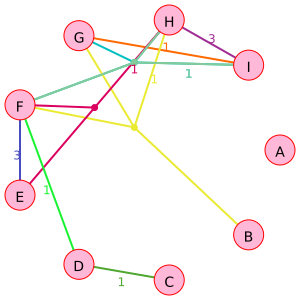

In [47]:
hNet.draw()

In [184]:
alph = 0.5 #0.47 # -1
display(Latex('$2^{{p}}$'.replace('p',str(alph*initT))))
print("Naive result (no partitioning)")

<IPython.core.display.Latex object>

Naive result (no partitioning)


In [185]:
display(Latex(getTotalCostLatex(gs,hNet.copy(),alph)))
print("The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)")

<IPython.core.display.Latex object>

The first term here is due to the precompiling (T-counts and local cuts), and the second is due to the cross-referencing (pairwise regrouping)


In [186]:
k=1:   51.5  |  0
k=2:   27.5  |  2
k=3:   28.0  |  3
k=4:   22.0  |  4
k=5:   18.0  |  6
k=6:   17.0  |  6
k=7:   16.0  |  8
k=8:   14.5  |  9
k=9:   11.5  |  9

SyntaxError: invalid syntax (671795101.py, line 1)

In [2]:
#--

In [3]:
# QUIZX TEST...

In [4]:
NQ = 10
depth = 100

g = zx.generate.cliffordT(NQ,depth)
g.apply_state("+"*NQ)
g.apply_effect("+"*NQ)
zx.draw(g,scale=20,labels=True)
gBackup = g.copy()
zx.simplify.full_reduce(g)
g.normalize()
g = g.copy()
zx.draw(g,scale=20,labels=True)
initT = zx.tcount(g) #TEMP
zx.tcount(g)

10

In [21]:
#--

In [10]:
segA = zxp.regroup.Segment()
segA.scalars = [(1+0j),(2+0j),(3+0j),(4+0j)]
segA.localParams = ['a','b']

segB = zxp.regroup.Segment()
segB.scalars = [(5+0j),(6+0j),(7+0j),(8+0j)]
segB.localParams = ['b','c']

segs = [segA,segB]

In [11]:
#zxp.regroup.regroupPair(segs,0,1)    # CPU
zxp.regroup.regroupPairGPU(segs,0,1) # GPU

[(19+0j), (22+0j), (43+0j), (50+0j)]


True

In [12]:
print(segs[0].localParams)
print(segs[0].scalars)

['a', 'c']
[(19+0j), (22+0j), (43+0j), (50+0j)]


In [13]:
print(segs[1].localParams)
print(segs[1].scalars)

[]
[]


In [14]:
# 19
# 22
# 43
# 50

In [22]:
#--

In [60]:
#CPU
print(
    '''['b']
SEG 0 ===> [(-0.03661165235168126+0.21338834764831813j), (0.37499999999999944-2.7755575615628914e-16j)] 

['b', 'h', 'j', 'k']
SEG 3 ===> [(-1.7172886266853768e-17-0.062499999999999924j), (0.04419417382415915-0.044194173824159175j), (0.04419417382415916-0.04419417382415919j), (-0.06249999999999994+3.9840779656275855e-17j), (-0.018305826175840766-0.01830582617584075j), (1.4927259549972292e-17+0.025888347648318405j), (3.925231146709433e-17+0.15088834764831827j), (-0.10669417382415901+0.10669417382415919j), (3.925231146709433e-17+0.06250000000000001j), (0.04419417382415918-0.04419417382415928j), (0.04419417382415913-0.0441941738241592j), (0.062499999999999924-7.291021910165304e-17j), (-0.10669417382415913-0.10669417382415906j), (-1.2297936212432634e-16-0.15088834764831827j), (-2.842024161678598e-17-0.025888347648318443j), (-0.01830582617584075+0.018305826175840815j)] 

NEW ===> [(0.013336771728019867+0.002288228271980073j), (0.007812499999999993+0.01104854345603976j), (0.007812499999999994+0.011048543456039764j), (0.002288228271980068-0.01333677172801987j), (0.004576456543960177-0.0032360434560398032j), (-0.005524271728019887-0.0009478151840596955j), (-0.032197815184059626-0.005524271728019842j), (-0.018861043456039804-0.026673543456039693j), (3.206685155992843e-17+0.02343749999999997j), (0.016572815184059654-0.01657281518405972j), (0.016572815184059637-0.01657281518405969j), (0.023437499999999938-4.46885669228879e-17j), (-0.04001031518405964-0.040010315184059564j), (-8.799719022332432e-17-0.05658313036811927j), (-1.7843050513460642e-17-0.009708130368119402j), (-0.006864684815940265+0.006864684815940301j)]
'''
)

['b']
SEG 0 ===> [(-0.03661165235168126+0.21338834764831813j), (0.37499999999999944-2.7755575615628914e-16j)] 

['b', 'h', 'j', 'k']
SEG 3 ===> [(-1.7172886266853768e-17-0.062499999999999924j), (0.04419417382415915-0.044194173824159175j), (0.04419417382415916-0.04419417382415919j), (-0.06249999999999994+3.9840779656275855e-17j), (-0.018305826175840766-0.01830582617584075j), (1.4927259549972292e-17+0.025888347648318405j), (3.925231146709433e-17+0.15088834764831827j), (-0.10669417382415901+0.10669417382415919j), (3.925231146709433e-17+0.06250000000000001j), (0.04419417382415918-0.04419417382415928j), (0.04419417382415913-0.0441941738241592j), (0.062499999999999924-7.291021910165304e-17j), (-0.10669417382415913-0.10669417382415906j), (-1.2297936212432634e-16-0.15088834764831827j), (-2.842024161678598e-17-0.025888347648318443j), (-0.01830582617584075+0.018305826175840815j)] 

NEW ===> [(0.013336771728019867+0.002288228271980073j), (0.007812499999999993+0.01104854345603976j), (0.00781249999

In [59]:
print('''
['b']
SEG 0 ===> [(-0.03661165235168126+0.21338834764831813j), (0.37499999999999944-2.7755575615628914e-16j)] 

['b', 'h', 'j', 'k']
SEG 3 ===> [(-1.7172886266853768e-17-0.062499999999999924j), (0.04419417382415915-0.044194173824159175j), (0.04419417382415916-0.04419417382415919j), (-0.06249999999999994+3.9840779656275855e-17j), (-0.018305826175840766-0.01830582617584075j), (1.4927259549972292e-17+0.025888347648318405j), (3.925231146709433e-17+0.15088834764831827j), (-0.10669417382415901+0.10669417382415919j), (3.925231146709433e-17+0.06250000000000001j), (0.04419417382415918-0.04419417382415928j), (0.04419417382415913-0.0441941738241592j), (0.062499999999999924-7.291021910165304e-17j), (-0.10669417382415913-0.10669417382415906j), (-1.2297936212432634e-16-0.15088834764831827j), (-2.842024161678598e-17-0.025888347648318443j), (-0.01830582617584075+0.018305826175840815j)] 

NEW ===> [(0.013336772099137306+0.025725727900862694j), (0.02438531443476677-0.005524271167814732j), (0.02438531443476677-0.005524271167814732j), (0.025725727900862694-0.013336772099137306j), (-0.03543386235833168-0.04324636235833168j), (-0.005524272099137306-0.05753094702959061j), (-0.03219781816005707-0.015232402831315994j), (-0.025725729763507843-0.01980886049568653j), 0j, 0j, 0j, 0j, 0j, 0j, 0j, 0j]
''')


['b']
SEG 0 ===> [(-0.03661165235168126+0.21338834764831813j), (0.37499999999999944-2.7755575615628914e-16j)] 

['b', 'h', 'j', 'k']
SEG 3 ===> [(-1.7172886266853768e-17-0.062499999999999924j), (0.04419417382415915-0.044194173824159175j), (0.04419417382415916-0.04419417382415919j), (-0.06249999999999994+3.9840779656275855e-17j), (-0.018305826175840766-0.01830582617584075j), (1.4927259549972292e-17+0.025888347648318405j), (3.925231146709433e-17+0.15088834764831827j), (-0.10669417382415901+0.10669417382415919j), (3.925231146709433e-17+0.06250000000000001j), (0.04419417382415918-0.04419417382415928j), (0.04419417382415913-0.0441941738241592j), (0.062499999999999924-7.291021910165304e-17j), (-0.10669417382415913-0.10669417382415906j), (-1.2297936212432634e-16-0.15088834764831827j), (-2.842024161678598e-17-0.025888347648318443j), (-0.01830582617584075+0.018305826175840815j)] 

NEW ===> [(0.013336772099137306+0.025725727900862694j), (0.02438531443476677-0.005524271167814732j), (0.0243853144

In [67]:
segA = zxp.regroup.Segment()
segA.scalars = [(-0.03661165235168126+0.21338834764831813j), (0.37499999999999944-2.7755575615628914e-16j)] 
segA.localParams = ['b']

segB = zxp.regroup.Segment()
segB.scalars = [(-1.7172886266853768e-17-0.062499999999999924j), (0.04419417382415915-0.044194173824159175j), (0.04419417382415916-0.04419417382415919j), (-0.06249999999999994+3.9840779656275855e-17j), (-0.018305826175840766-0.01830582617584075j), (1.4927259549972292e-17+0.025888347648318405j), (3.925231146709433e-17+0.15088834764831827j), (-0.10669417382415901+0.10669417382415919j), (3.925231146709433e-17+0.06250000000000001j), (0.04419417382415918-0.04419417382415928j), (0.04419417382415913-0.0441941738241592j), (0.062499999999999924-7.291021910165304e-17j), (-0.10669417382415913-0.10669417382415906j), (-1.2297936212432634e-16-0.15088834764831827j), (-2.842024161678598e-17-0.025888347648318443j), (-0.01830582617584075+0.018305826175840815j)]
segB.localParams = ['b','h','j','k']

segs = [segA,segB]

In [62]:
zxp.regroup.regroupPairGPU(segs,0,1) # GPU

['b']
SEG 0 ===> [(-0.03661165235168126+0.21338834764831813j), (0.37499999999999944-2.7755575615628914e-16j)] 

['b', 'h', 'j', 'k']
SEG 1 ===> [(-1.7172886266853768e-17-0.062499999999999924j), (0.04419417382415915-0.044194173824159175j), (0.04419417382415916-0.04419417382415919j), (-0.06249999999999994+3.9840779656275855e-17j), (-0.018305826175840766-0.01830582617584075j), (1.4927259549972292e-17+0.025888347648318405j), (3.925231146709433e-17+0.15088834764831827j), (-0.10669417382415901+0.10669417382415919j), (3.925231146709433e-17+0.06250000000000001j), (0.04419417382415918-0.04419417382415928j), (0.04419417382415913-0.0441941738241592j), (0.062499999999999924-7.291021910165304e-17j), (-0.10669417382415913-0.10669417382415906j), (-1.2297936212432634e-16-0.15088834764831827j), (-2.842024161678598e-17-0.025888347648318443j), (-0.01830582617584075+0.018305826175840815j)] 

NEW ===> [(0.013336772099137306+0.025725727900862694j), (0.02438531443476677-0.005524271167814732j), (0.02438531443

True

In [68]:
noncommonParams = list(set(pairParams).symmetric_difference(zxp.getExclusivelyCommonParams(segs,0,1)))
noncommonParams.sort()
noncommonParams

['h', 'j', 'k']